# Set up

In [1]:
# Set up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math


In [2]:
# Load data
data = pd.read_excel("Boston_Housing.xlsx")

Source: https://faculty.tuck.dartmouth.edu/images/uploads/faculty/business-analytics/Boston_Housing.xlsx

# Data Exploration

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

## Attributes
- CRIM - per capita crime rate by town  
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
- INDUS - proportion of non-retail business acres per town.  
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
- NOX - nitric oxides concentration (parts per 10 million)  
- RM - average number of rooms per dwelling  
- AGE - proportion of owner-occupied units built prior to 1940  
- DIS - weighted distances to five Boston employment centres  
- RAD - index of accessibility to radial highways  
- TAX - full-value property-tax rate per $10,000  
- PTRATIO - pupil-teacher ratio by town  
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
- LSTAT - % lower status of the population  
- MEDV - Median value of owner-occupied homes in $1000's

In [5]:
# Drop column that could introduce systemic racism
data = data.drop('B', axis=1)

In [6]:
# Check missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [7]:
# Check value ranges
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
# Split up predictors and target
y = data['MEDV']
X = data.drop(columns=['MEDV'])


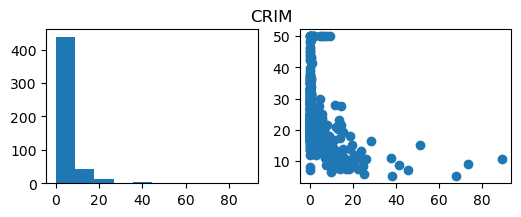

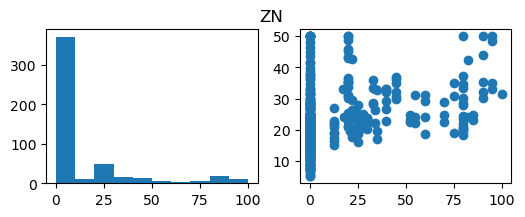

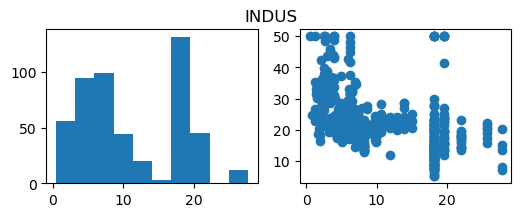

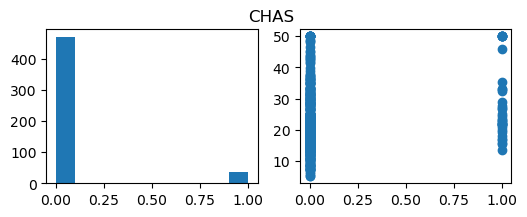

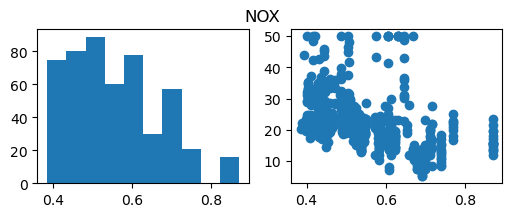

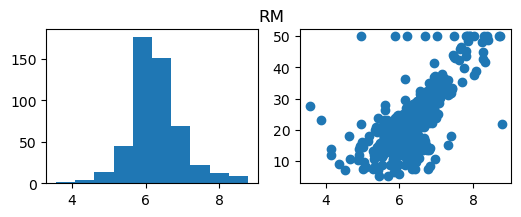

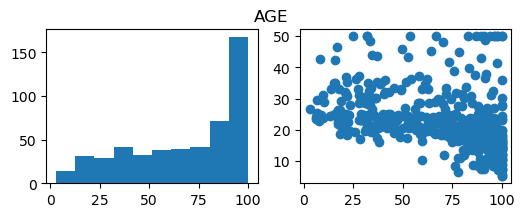

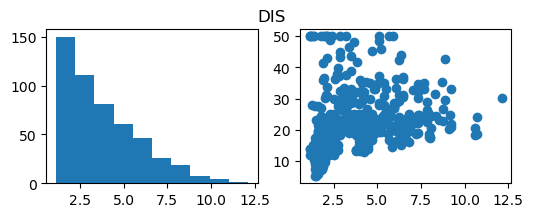

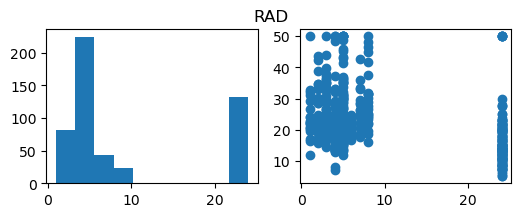

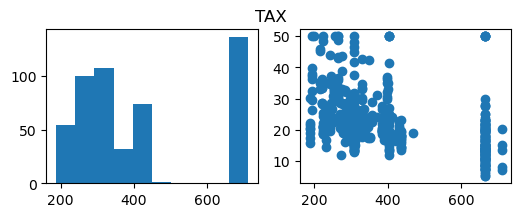

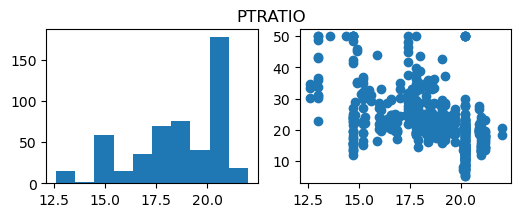

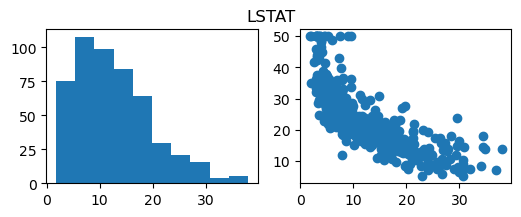

In [9]:
# Distribution of predictors and relationship with target
for col in X.columns:
    fig, ax = plt.subplots(1, 2, figsize=(6,2))
    ax[0].hist(X[col])
    ax[1].scatter(X[col], y)
    fig.suptitle(col)
    plt.show()


# Linear Regression

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
def compute_cost(X, y, w, b): 
    m = X.shape[0] 
    
    f_wb = np.dot(X, w) + b
    cost = np.sum(np.power(f_wb - y, 2))
    
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [13]:
w_init = np.full((X_train.shape[1],), 0.01)
b_init = 0

# test cost calculation
cost = compute_cost(X_train, y_train, w_init, b_init)
print(cost)

200.8114435805119


In [14]:
w_init.shape

(12,)

In [15]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    err = (np.dot(X, w) + b) - y
    dj_dw = np.dot(X.T, err)    # dimension: (n,m)*(m,1)=(n,1)
    dj_db = np.sum(err)
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw

In [16]:
# test calculate gradients
dj_db, dj_dw = compute_gradient(X_train, y_train, w_init, b_init)

print(dj_db, dj_dw)

-17.117432515099008 [-1.71355358e+01 -3.05247319e+02 -1.46307314e+02 -1.62416646e+00
 -8.86162074e+00 -1.12794826e+02 -1.04230590e+03 -7.22363742e+01
 -1.11409321e+02 -5.75263925e+03 -3.02699050e+02 -1.58019566e+02]


In [17]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = cost_function(X, y, w, b)
        J_history.append(cost)
        
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
        
    return w, b, J_history

In [18]:
iterations = 1000
alpha = 1.0e-6

w_out, b_out, J_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost   169.76
Iteration  100: Cost   106.96
Iteration  200: Cost   101.11
Iteration  300: Cost    95.90
Iteration  400: Cost    91.26
Iteration  500: Cost    87.12
Iteration  600: Cost    83.44
Iteration  700: Cost    80.15
Iteration  800: Cost    77.21
Iteration  900: Cost    74.58


In [19]:
print(f"Training result: w = {w_out}, b = {b_out}")
print(f"MSE = {J_hist[-1]}")

Training result: w = [-0.0306403   0.16052319 -0.00196307  0.01076012  0.01142824  0.04171573
  0.10741219  0.0364676  -0.02385794  0.0212372   0.07183189 -0.00835493], b = 0.004188833922854262
MSE = 72.2513077537837


In [20]:
def plot_cost(data, cost_type):
    plt.figure(figsize=(4,2))
    plt.plot(data)
    plt.xlabel("Iteration Step")
    plt.ylabel(cost_type)
    plt.title("Cost vs. Iteration")
    plt.show()    

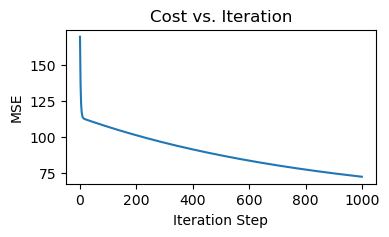

In [21]:
plot_cost(J_hist, "MSE")

In [22]:
def predict(X, w, b):
    p = np.dot(X, w) + b
    return p

In [23]:
def plot_pred_actual(y_actual, y_pred):
    x_ul = int(math.ceil(max(y_actual.max(), y_pred.max()) / 10.0)) * 10
    y_ul = x_ul

    plt.figure(figsize=(4,4))
    plt.scatter(y_actual, y_pred)
    plt.xlim(0, x_ul)
    plt.ylim(0, y_ul)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Predicted vs Actual values")
    plt.show()

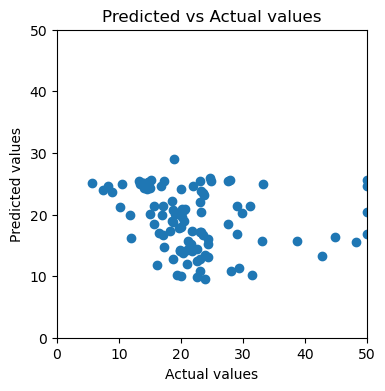

In [24]:
y_pred = predict(X_test, w_out, b_out)

plot_pred_actual(y_test, y_pred)

In [25]:
def compute_mse(y1, y2):
    return np.mean(np.power((y1 - y2),2))

In [26]:
mse = compute_mse(y_test, y_pred)
print(mse)

132.83636802687786


In [27]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(mse)

132.83636802687786


## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
standard_scaler = StandardScaler()
X_train_norm = standard_scaler.fit_transform(X_train)
X_test_norm = standard_scaler.transform(X_test)

In [30]:
print(X_train_norm.min(axis=0))
print(X_train_norm.max(axis=0))

[-0.41585389 -0.49960763 -1.52676181 -0.27288841 -1.48521471 -3.95023393
 -2.35561695 -1.24929432 -0.97145156 -1.26486864 -2.67431562 -1.50565168]
[10.5304256   3.73631017  2.37911283  3.66450153  2.73874661  3.57176447
  1.10332748  4.0212862   1.68737845  1.80582587  1.61380336  3.32974483]


In [31]:
print(standard_scaler.scale_)

[8.12786482e+00 2.36076347e+01 6.98435113e+00 2.53975353e-01
 1.15057872e-01 6.93831576e-01 2.80721481e+01 2.07800639e+00
 8.65042138e+00 1.70645434e+02 2.19210336e+00 7.28999160e+00]


In [32]:
iterations = 1000
alpha = 1.0e-2

w_out, b_out, J_hist = gradient_descent(X_train_norm, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost   290.91
Iteration  100: Cost    45.56
Iteration  200: Cost    15.20
Iteration  300: Cost    11.01
Iteration  400: Cost    10.34
Iteration  500: Cost    10.18
Iteration  600: Cost    10.10
Iteration  700: Cost    10.05
Iteration  800: Cost    10.01
Iteration  900: Cost     9.98


In [33]:
print(f"Training result: w = {w_out}, b = {b_out}")
print(f"Training MSE = {J_hist[-1]}")

Training result: w = [-0.87200786  0.83235112 -0.35656148  0.70462672 -1.44874782  2.69272839
 -0.12111304 -2.55104665  0.89855827 -0.93374049 -2.151963   -3.7142413 ], b = 22.61090500500162
Training MSE = 9.95513733581214


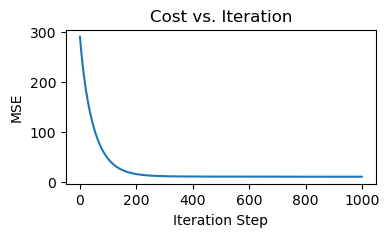

In [34]:
plot_cost(J_hist, "MSE")

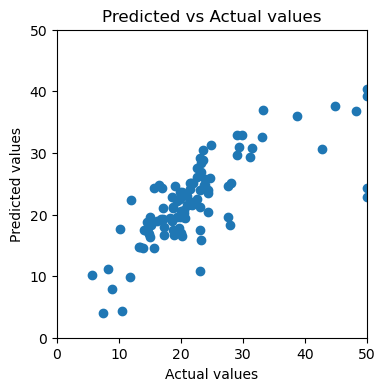

In [35]:
y_pred = predict(X_test_norm, w_out, b_out)

plot_pred_actual(y_test, y_pred)

In [36]:
mse = compute_mse(y_test, y_pred)
print(f"Test MSE = {mse}")

Test MSE = 35.66317674147827


## Regularization

In [37]:
def compute_cost_ridge(X, y, w, b, lambda_ = 1): 
    m = X.shape[0] 
    
    f_wb = np.dot(X, w) + b
    cost = np.sum(np.power(f_wb - y, 2))    

    reg_cost = np.sum(np.power(w, 2))

    total_cost = 1 / (2 * m) * cost + (lambda_ / (2 * m)) * reg_cost

    return total_cost

In [38]:
cost = compute_cost_ridge(X_train, y_train, w_init, b_init, lambda_=0.7)
print(cost)

200.81144462011588


In [39]:
def compute_gradient_ridge(X, y, w, b, lambda_):
    m = X.shape[0]

    err = np.dot(X, w) + b - y
    dj_dw = np.dot(X.T, err) / m + (lambda_ / m) * w
    dj_db = np.sum(err) / m

    return dj_db, dj_dw

In [40]:
dj_db, dj_dw =  compute_gradient_ridge(X_train, y_train, w_init, b_init, lambda_=0.7)
print(dj_db, dj_dw)

-17.117432515099008 [-1.71355185e+01 -3.05247302e+02 -1.46307297e+02 -1.62414914e+00
 -8.86160341e+00 -1.12794809e+02 -1.04230589e+03 -7.22363569e+01
 -1.11409303e+02 -5.75263924e+03 -3.02699033e+02 -1.58019549e+02]


In [41]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, lambda_=0.7, num_iters=1000):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b, lambda_)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = cost_function(X, y, w, b, lambda_)
        J_history.append(cost)
        
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
        
    return w, b, J_history

In [42]:
iterations = 1000
alpha = 1.0e-2
lambda_ = 1

w_out, b_out, J_hist = gradient_descent(X_train_norm, y_train, w_init, b_init, compute_cost_ridge, compute_gradient_ridge, alpha, lambda_, iterations)

Iteration    0: Cost   290.91
Iteration  100: Cost    45.59
Iteration  200: Cost    15.24
Iteration  300: Cost    11.05
Iteration  400: Cost    10.38
Iteration  500: Cost    10.22
Iteration  600: Cost    10.14
Iteration  700: Cost    10.09
Iteration  800: Cost    10.06
Iteration  900: Cost    10.03


In [43]:
print(f"Training result: w = {w_out}, b = {b_out}")
print(f"Training MSE = {J_hist[-1]}")

Training result: w = [-0.86996629  0.82769399 -0.35944104  0.7051097  -1.43568137  2.69434668
 -0.12306667 -2.53197524  0.88587909 -0.92817437 -2.14746836 -3.70146378], b = 22.61090500500162
Training MSE = 10.005991756561285


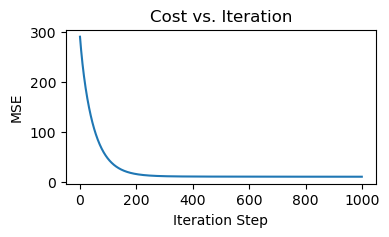

In [44]:
plot_cost(J_hist, "MSE")

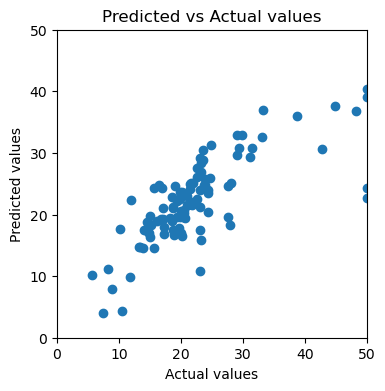

In [45]:
y_pred = predict(X_test_norm, w_out, b_out)

plot_pred_actual(y_test, y_pred)

In [46]:
mse = compute_mse(y_test, y_pred)
print(f"Test MSE = {mse}")

Test MSE = 35.70647871590857


In [47]:
def compute_cost_lasso(X, y, w, b, lambda_ = 0.7): 
    m = X.shape[0] 
    
    f_wb = np.dot(X, w) + b
    cost = np.sum(np.power(f_wb - y, 2))    

    reg_cost = np.sum(np.abs(w))

    total_cost = 1 / (2 * m) * cost + (lambda_ / (2 * m)) * reg_cost

    return total_cost

In [48]:
cost = compute_cost_lasso(X_train, y_train, w_init, b_init, lambda_=0.7)
print(cost)

200.81154754090795


In [49]:
def compute_gradient_lasso(X, y, w, b, lambda_=0.7):
    m = X.shape[0]

    err = np.dot(X, w) + b - y
    dj_dw = np.dot(X.T, err) / m + (lambda_ / m) * np.sign(w)
    dj_db = np.sum(err) / m

    return dj_db, dj_dw

In [50]:
dj_db, dj_dw =  compute_gradient_lasso(X_train, y_train, w_init, b_init, lambda_=0.7)
print(dj_db, dj_dw)

-17.117432515099008 [-1.71338031e+01 -3.05245586e+02 -1.46305582e+02 -1.62243379e+00
 -8.85988806e+00 -1.12793094e+02 -1.04230417e+03 -7.22346415e+01
 -1.11407588e+02 -5.75263752e+03 -3.02697317e+02 -1.58017834e+02]


In [51]:
iterations = 1000
alpha = 1.0e-2
lambda_ = 1

w_out, b_out, J_hist = gradient_descent(X_train_norm, y_train, w_init, b_init, compute_cost_lasso, compute_gradient_lasso, alpha, lambda_, iterations)

Iteration    0: Cost   290.91
Iteration  100: Cost    45.58
Iteration  200: Cost    15.22
Iteration  300: Cost    11.03
Iteration  400: Cost    10.36
Iteration  500: Cost    10.20
Iteration  600: Cost    10.12
Iteration  700: Cost    10.07
Iteration  800: Cost    10.03
Iteration  900: Cost    10.00


In [52]:
print(f"Training result: w = {w_out}, b = {b_out}")
print(f"Training MSE = {J_hist[-1]}")

Training result: w = [-0.86643384  0.82700157 -0.35437324  0.70320366 -1.44112303  2.69451013
 -0.11649385 -2.53543865  0.88170899 -0.92308699 -2.15014264 -3.71479811], b = 22.61090500500162
Training MSE = 9.979941121820051


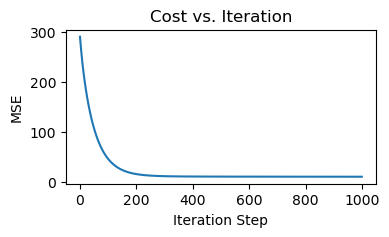

In [53]:
plot_cost(J_hist, "MSE")

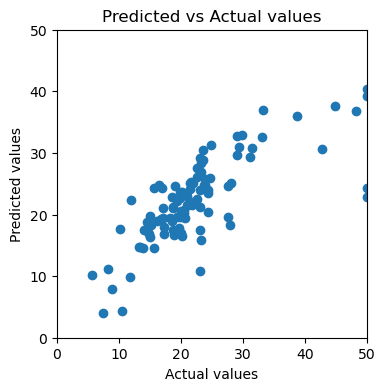

In [54]:
y_pred = predict(X_test_norm, w_out, b_out)

plot_pred_actual(y_test, y_pred)

In [55]:
mse = compute_mse(y_test, y_pred)
print(f"Test MSE = {mse}")

Test MSE = 35.69124127460662


Coordinate Descent for LASSO  
Source: 
- https://xavierbourretsicotte.github.io/lasso_implementation.html
- https://www.kaggle.com/code/ddatad/coordinate-descent-for-lasso-normal-regression

In [56]:
def soft_threshold(rho, lamda_):
    if rho < - lamda_:
        return (rho + lamda_)
    elif rho >  lamda_:
        return (rho - lamda_)
    else: 
        return 0    

In [57]:
def compute_residuals(X, y, w, b):
    return y - (np.dot(X, w) + b)

In [58]:
def compute_rho_j(X, y, w, b, j):
    X_k = np.delete(X, j, axis=1)    # remove the jth element
    w_k = np.delete(w, j)    # remove the jth element

    err = compute_residuals(X_k, y, w_k, b)

    X_j = X[:,j]
    rho_j = np.dot(X_j, err)
    
    return rho_j

In [59]:
def coordinate_descent_lasso(X, y, w_in, b_in, cost_function, lambda_, num_iters=1000, tolerance=1e-4):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    n = X.shape[1]

    for i in range(num_iters):
        # Update weights
        for j in range(n):
            X_j = X[:,j]
            rho_j = compute_rho_j(X, y, w, b, j)
            w[j] = soft_threshold(rho_j, lambda_) / np.sum(X_j ** 2)

        # Update bias
        b = np.mean(y - np.dot(X, w))
        err = compute_residuals(X, y, w, b)

        # Calculate total cost
        cost = cost_function(X, y, w, b, lambda_)
        J_history.append(cost)

        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

        # Check convergence
        if np.max(np.abs(err)) < tolerance:
            break

    return w, b, J_history

In [60]:
iterations = 1000
lambda_ = 1e-4
tolerance = 1e-4

w_out, b_out, J_hist = coordinate_descent_lasso(X_train_norm, y_train, w_init, b_init, compute_cost_lasso, lambda_, iterations, tolerance)

Iteration    0: Cost    17.11
Iteration  100: Cost     9.85
Iteration  200: Cost     9.85
Iteration  300: Cost     9.85
Iteration  400: Cost     9.85
Iteration  500: Cost     9.85
Iteration  600: Cost     9.85
Iteration  700: Cost     9.85
Iteration  800: Cost     9.85
Iteration  900: Cost     9.85


In [61]:
print(f"Training result: w = {w_out}, b = {b_out}")
print(f"Training MSE = {J_hist[-1]}")

Training result: w = [-9.78594680e-01  1.07703678e+00  2.84650972e-03  6.45116625e-01
 -1.96309354e+00  2.46582238e+00  2.56911937e-02 -2.92340870e+00
  1.91962387e+00 -1.89286365e+00 -2.24724807e+00 -3.84990919e+00], b = 22.611881188118804
Training MSE = 9.850426245645366


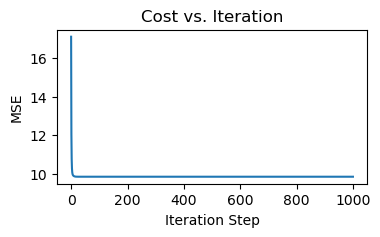

In [62]:
plot_cost(J_hist, "MSE")

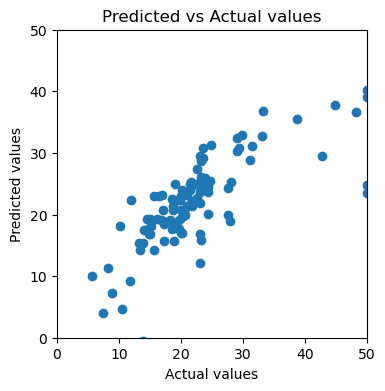

In [63]:
y_pred = predict(X_test_norm, w_out, b_out)

plot_pred_actual(y_test, y_pred)

In [64]:
mse = compute_mse(y_test, y_pred)
print(f"Test MSE = {mse}")

Test MSE = 34.3950680193062


# Regression Tree

Reference: https://medium.com/@beratyildirim/regression-tree-from-scratch-using-python-a74dba2bba5f

In [65]:
def get_best_split(x, y):
    # Get all mid-point values as potential splits
    unique_values = np.unique(x)
    splits = (unique_values[:-1] + unique_values[1:]) / 2 

    # Calculate cost
    err = [compute_mse(y[x <= split], np.mean(y[x <= split])) + compute_mse(y[x > split], np.mean(y[x > split])) for split in splits]
    min_err = np.min(err)

    # The value that minimizes cost is the best split value
    best_split = splits[np.argmin(err)]
    
    return best_split, min_err

In [66]:
def build_tree(X, y, depth=0, max_depth=5, min_samples_split=2, min_samples_leaf=1):
    # Number of samples at this node
    num_samples = len(X)
    
    # Use mean of y values in this group as predicted value
    prediction = np.mean(y)

    # Stopping criteria
    if depth == max_depth or len(np.unique(y)) == 1 or num_samples < min_samples_split:
        return (prediction, num_samples)

    # Iterate through all the features to find the best feature to split at each node
    best_feature, best_split, min_err = None, None, float('inf')
    
    for feature in X.columns:
        split, err = get_best_split(X[feature], y)
        
        # Only update when it decreases the error
        if err < min_err:
            best_feature, best_split, min_err = feature, split, err

    # If no feature split decrease the error, return mean of overall dataset
    if min_err == float('inf') or len(X) < min_samples_leaf:
        return prediction

    left_idx = (X[best_feature] <= best_split)
    right_idx = (X[best_feature] > best_split)

    # Recusively build subtrees
    left_subtree = build_tree(X[left_idx], y[left_idx], depth + 1, max_depth)
    right_subtree = build_tree(X[right_idx], y[right_idx], depth + 1, max_depth)

    return (best_feature, best_split, left_subtree, right_subtree, num_samples)


In [67]:
tree = build_tree(X_train, y_train, max_depth=5, min_samples_split=10, min_samples_leaf=5)
print(tree)

('INDUS', 1.2149999999999999, (50.0, 2), ('LSTAT', 1.855, (50.0, 1), ('LSTAT', 35.875, ('INDUS', 1.2349999999999999, (35.4, 1), ('LSTAT', 2.225, (34.9, 1), (22.381658291457285, 398), 399), 400), (7.0, 1), 401), 402), 404)


## Visualize Tree

In [68]:
def print_tree(tree, depth=0, branch_name="Root"):
    # Leaf node
    if len(tree) == 2: 
        print(f"{'-' * depth}Depth={depth}, branch={branch_name}, number of samples={tree[1]}, predicted value: {tree[0]}")
        return

    feature, split, left_subtree, right_subtree, num_samples = tree
    
    # Recursively print out subtrees
    print(f"{'-' * depth}Depth={depth}, branch={branch_name}, number of samples={num_samples}, split on feature={feature}, threshold={round(split,2)}")
    print_tree(left_subtree, depth + 1, "Left (<=threshold)")
    print_tree(right_subtree, depth + 1, "Right (>threshold)")

In [69]:
print_tree(tree, depth=0, branch_name="Root")

Depth=0, branch=Root, number of samples=404, split on feature=INDUS, threshold=1.21
-Depth=1, branch=Left (<=threshold), number of samples=2, predicted value: 50.0
-Depth=1, branch=Right (>threshold), number of samples=402, split on feature=LSTAT, threshold=1.86
--Depth=2, branch=Left (<=threshold), number of samples=1, predicted value: 50.0
--Depth=2, branch=Right (>threshold), number of samples=401, split on feature=LSTAT, threshold=35.88
---Depth=3, branch=Left (<=threshold), number of samples=400, split on feature=INDUS, threshold=1.23
----Depth=4, branch=Left (<=threshold), number of samples=1, predicted value: 35.4
----Depth=4, branch=Right (>threshold), number of samples=399, split on feature=LSTAT, threshold=2.22
-----Depth=5, branch=Left (<=threshold), number of samples=1, predicted value: 34.9
-----Depth=5, branch=Right (>threshold), number of samples=398, predicted value: 22.381658291457285
---Depth=3, branch=Right (>threshold), number of samples=1, predicted value: 7.0


In [70]:
def predict_sample(sample, tree):
    if len(tree) == 2:  # If it's a leaf node, return the predicted value
        return tree[0]
    
    feature, split, left_subtree, right_subtree, num_samples = tree
    if sample[feature] <= split:
        return predict_sample(sample, left_subtree)
    else:
        return predict_sample(sample, right_subtree)

def predict(X, tree):
    predictions = []
    for idx, sample in X.iterrows():
        prediction = predict_sample(sample, tree)
        predictions.append(prediction)
    return np.array(predictions)

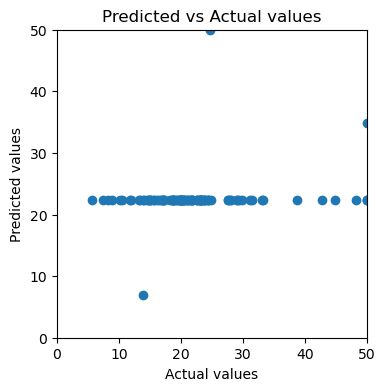

In [71]:
y_pred = predict(X_test, tree)

plot_pred_actual(y_test, y_pred)

In [72]:
mse = compute_mse(y_test, y_pred)
print(f"Test MSE = {mse}")

Test MSE = 82.16595072304568


In [73]:
tree = build_tree(X_train, y_train, max_depth=10, min_samples_split=10, min_samples_leaf=5)
print_tree(tree, depth=0, branch_name="Root")

Depth=0, branch=Root, number of samples=404, split on feature=INDUS, threshold=1.21
-Depth=1, branch=Left (<=threshold), number of samples=2, predicted value: 50.0
-Depth=1, branch=Right (>threshold), number of samples=402, split on feature=LSTAT, threshold=1.86
--Depth=2, branch=Left (<=threshold), number of samples=1, predicted value: 50.0
--Depth=2, branch=Right (>threshold), number of samples=401, split on feature=LSTAT, threshold=35.88
---Depth=3, branch=Left (<=threshold), number of samples=400, split on feature=INDUS, threshold=1.23
----Depth=4, branch=Left (<=threshold), number of samples=1, predicted value: 35.4
----Depth=4, branch=Right (>threshold), number of samples=399, split on feature=LSTAT, threshold=2.22
-----Depth=5, branch=Left (<=threshold), number of samples=1, predicted value: 34.9
-----Depth=5, branch=Right (>threshold), number of samples=398, split on feature=LSTAT, threshold=2.67
------Depth=6, branch=Left (<=threshold), number of samples=1, predicted value: 41

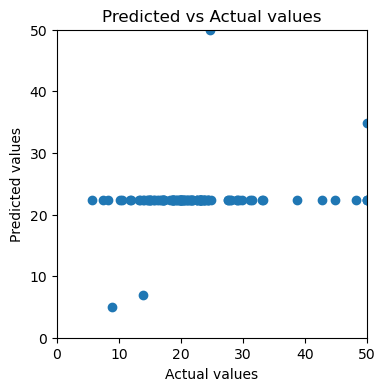

In [74]:
y_pred = predict(X_test, tree)

plot_pred_actual(y_test, y_pred)

In [75]:
mse = compute_mse(y_test, y_pred)
print(f"Test MSE = {mse}")

Test MSE = 80.46697680838615


## Grid Search

In [76]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [77]:
best_score = float('inf')
best_params = {}

for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            
            # Build tree based on current parameters using train set
            tree = build_tree(X_train, y_train, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

            # Evaluate the tree on validation set
            y_pred = predict(X_test, tree)
            score = compute_mse(y_test, y_pred)

            # Update best parameters if the current score is better
            if score < best_score:
                best_score = score
                best_params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best score: 80.36035501313927


In [78]:
tree = build_tree(X_train, y_train, max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'])
print_tree(tree, depth=0, branch_name="Root")

Depth=0, branch=Root, number of samples=404, split on feature=INDUS, threshold=1.21
-Depth=1, branch=Left (<=threshold), number of samples=2, predicted value: 50.0
-Depth=1, branch=Right (>threshold), number of samples=402, split on feature=LSTAT, threshold=1.86
--Depth=2, branch=Left (<=threshold), number of samples=1, predicted value: 50.0
--Depth=2, branch=Right (>threshold), number of samples=401, split on feature=LSTAT, threshold=35.88
---Depth=3, branch=Left (<=threshold), number of samples=400, split on feature=INDUS, threshold=1.23
----Depth=4, branch=Left (<=threshold), number of samples=1, predicted value: 35.4
----Depth=4, branch=Right (>threshold), number of samples=399, split on feature=LSTAT, threshold=2.22
-----Depth=5, branch=Left (<=threshold), number of samples=1, predicted value: 34.9
-----Depth=5, branch=Right (>threshold), number of samples=398, split on feature=LSTAT, threshold=2.67
------Depth=6, branch=Left (<=threshold), number of samples=1, predicted value: 41

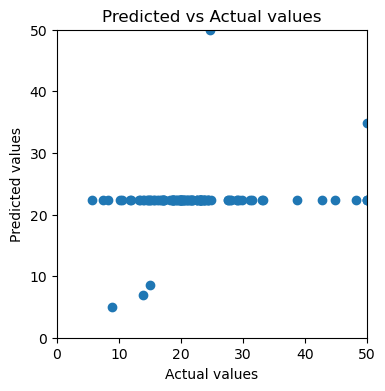

In [79]:
y_pred = predict(X_test, tree)

plot_pred_actual(y_test, y_pred)

## Loss Function

In [80]:
def compute_ssr(y1, y2):
    return np.sum(np.power((y1 - y2),2))

In [81]:
def get_best_split(x, y):
    # Get all mid-point values as potential splits
    unique_values = np.unique(x)

    # Handle the case where there's no valid split
    if len(unique_values) == 1: 
        return None, float('inf')

    # Take the mid point of each interval as split value
    splits = (unique_values[:-1] + unique_values[1:]) / 2 

    # Calculate cost
    err = [compute_ssr(y[x <= split], np.mean(y[x <= split])) + compute_ssr(y[x > split], np.mean(y[x > split])) for split in splits]
    min_err = np.min(err)

    # The value that minimizes cost is the best split value
    best_split = splits[np.argmin(err)]
    
    return best_split, min_err

In [82]:
tree = build_tree(X_train, y_train, max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'])
print_tree(tree, depth=0, branch_name="Root")

Depth=0, branch=Root, number of samples=404, split on feature=LSTAT, threshold=8.13
-Depth=1, branch=Left (<=threshold), number of samples=139, split on feature=RM, threshold=7.44
--Depth=2, branch=Left (<=threshold), number of samples=115, split on feature=RM, threshold=6.68
---Depth=3, branch=Left (<=threshold), number of samples=59, split on feature=CRIM, threshold=4.73
----Depth=4, branch=Left (<=threshold), number of samples=58, split on feature=RM, threshold=6.54
-----Depth=5, branch=Left (<=threshold), number of samples=44, split on feature=LSTAT, threshold=7.81
------Depth=6, branch=Left (<=threshold), number of samples=39, split on feature=AGE, threshold=56.5
-------Depth=7, branch=Left (<=threshold), number of samples=31, split on feature=RM, threshold=6.13
--------Depth=8, branch=Left (<=threshold), number of samples=5, split on feature=INDUS, threshold=7.76
---------Depth=9, branch=Left (<=threshold), number of samples=2, split on feature=CRIM, threshold=0.23
----------Dept

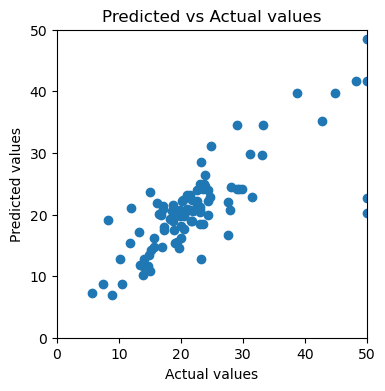

In [83]:
y_pred = predict(X_test, tree)

plot_pred_actual(y_test, y_pred)

In [84]:
mse = compute_mse(y_test, y_pred)
print(f"Test MSE = {mse}")

Test MSE = 30.82873127723311


## Visualize Predictions

In [129]:
# Get values of the first split
first_feature = tree[0]
first_split = tree[1]
print(f"First feature: {first_feature}; First split threshold: {first_split}")

left_idx = (X_test[first_feature] <= first_split)
right_idx = (X_test[first_feature] > first_split)


First feature: LSTAT; First split threshold: 8.129999999999999


Text(12.442647058823532, 24.21960784313725, 'Node prediction value')

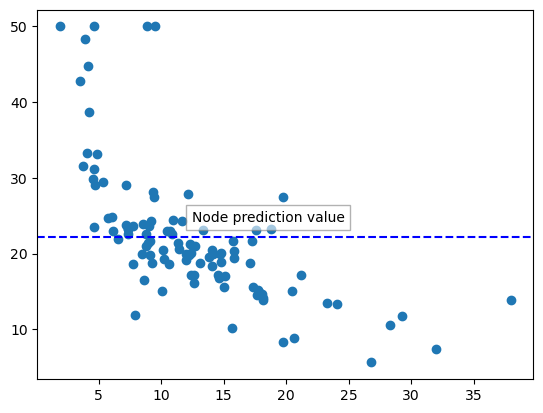

In [128]:
# Visualize the Node prediction
plt.scatter(X_test[first_feature], y_test)
plt.axhline(y=y_test.mean(), color="blue", linestyle ="--")
plt.annotate("Node prediction value", (X_test[first_feature].mean(), y_test.mean()+2), bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))

Text(8.47, 21.477631578947364, 'Right branch prediction value')

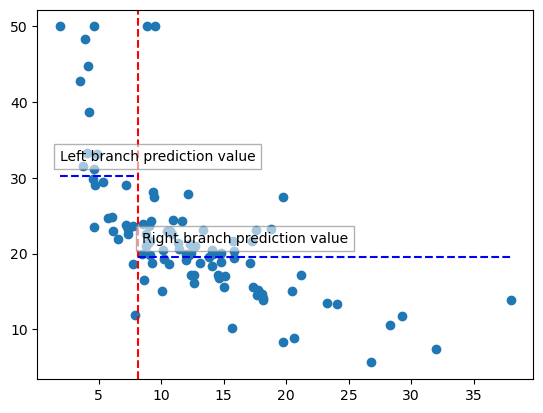

In [131]:
# Visualize the left and right branches
# Scatter plot of the first feature values and the target values
plt.scatter(X_test[first_feature], y_test)

# Show the first split threshold 
plt.axvline(x=first_split, color="red", linestyle ="--")

# Show the left branch prediction
plt.plot([X_test[first_feature].min(), first_split], [y_test[left_idx].mean()]*2, color="blue", linestyle ="--")

# Show the right branch prediction
plt.plot([first_split, X_test[first_feature].max()], [y_test[right_idx].mean()]*2, color="blue", linestyle ="--")

# annotate the left branch prediction value
plt.annotate("Left branch prediction value", (X_test[first_feature][left_idx].min(), y_test[left_idx].mean()+2), bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))
plt.annotate("Right branch prediction value", (X_test[first_feature][right_idx].min(), y_test[right_idx].mean()+2), bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))

# Neural Network

Reference:  
https://www.kaggle.com/code/harkiratvasir/boston-housing-neural-network-beginners-tutorial
https://www.kaggle.com/code/arunkumarramanan/tensorflow-tutorial-and-housing-price-prediction

In [84]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import Sequential

In [85]:
model = Sequential([
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'linear'),
])

model.compile(
    optimizer = 'adam',
    loss = 'mse'
)

In [86]:
model.fit(X_train_norm, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 2s 2ms/step - loss: 592.8099
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 578.1553
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 561.9399
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 541.0166
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 514.3997
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 479.8596
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 435.6849
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 381.6289
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 322.6970
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 258.2274
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 195.5171
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 143.1897
Epoch 13/100


4/4 [==============================] - 0s 2ms/step


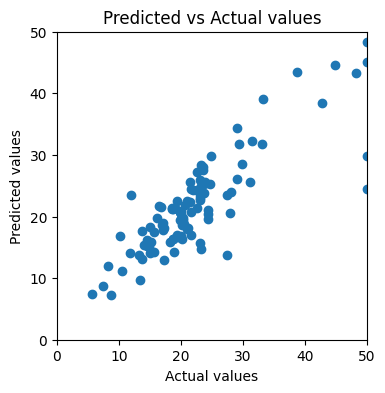

In [87]:
y_pred = model.predict(X_test_norm)

plot_pred_actual(y_test, y_pred)

In [88]:
mse = compute_mse(y_test, y_pred.reshape(-1))    # NN prediction shape is (n,1)
print(f"Test MSE = {mse}")

Test MSE = 23.389186481090075


Reference: https://github.com/knazeri/coursera/blob/master/deep-learning/1-neural-networks-and-deep-learning/4-building-your-deep-neural-network-step-by-step/dnn_utils_v2.py

In [89]:
def sigmoid(Z):    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):  
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [90]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [91]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    Z = np.dot(W, A) + b

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache    

In [92]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert(A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [93]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
        caches.append(cache)

    AL, cache = linear_forward(A, parameters['W' + str(L)], parameters['b' + str(L)])
    caches.append(cache)

    assert(AL.shape == (1, X.shape[1]))

    return AL, caches

In [94]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    cost = compute_mse(Y, AL.reshape(-1)) 
    cost = np.squeeze(cost)

    assert(cost.shape == ())

    return cost

In [95]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)

    return dA_prev, dW, db

In [96]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)

    dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db    

In [97]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """    
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.values.reshape(AL.shape)

    dAL = 2 * (AL - Y)

    # Lth layer (LINEAR) gradients
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_backward(dAL, current_cache)

    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l+1)] = dW_temp
        grads["db" + str(l+1)] = db_temp

    return grads

In [98]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

    return parameters    

In [99]:
def nn_model(X, Y, layer_dims, learning_rate, num_iterations=100):
    # Initialize parameters
    parameters = initialize_parameters_deep(layer_dims)

    J_history = []
    # Gradient Descents
    for i in range(num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        J_history.append(cost)

        if i % math.ceil(num_iterations/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    
    return parameters, J_history

In [101]:
parameters, J_history = nn_model(
    X_train_norm.T, 
    y_train, 
    [12, 32, 16, 1], 
    0.1,
    num_iterations=100
)

Iteration    0: Cost   596.44
Iteration   10: Cost   106.71
Iteration   20: Cost    85.39
Iteration   30: Cost    85.15
Iteration   40: Cost    85.14
Iteration   50: Cost    85.14
Iteration   60: Cost    85.14
Iteration   70: Cost    85.14
Iteration   80: Cost    85.14
Iteration   90: Cost    85.14


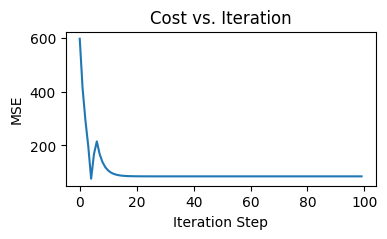

In [102]:
plot_cost(J_history, "MSE")

In [103]:
def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    AL, cache = L_model_forward(X, parameters)

    return AL

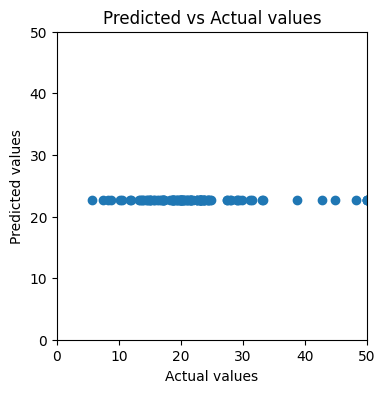

In [104]:
y_pred = predict(X_test_norm.T, parameters)

plot_pred_actual(y_test, y_pred)

In [105]:
mse = compute_mse(y_test, y_pred.reshape(-1))
print(f"Test MSE = {mse}")

Test MSE = 81.58231743216955


## Learning Rate

In [107]:
parameters, J_history = nn_model(
    X_train_norm.T, 
    y_train, 
    [12, 32, 16, 1], 
    0.01,
    num_iterations=100
)

Iteration    0: Cost   596.44
Iteration   10: Cost   420.26
Iteration   20: Cost    25.31
Iteration   30: Cost    22.32
Iteration   40: Cost    24.12
Iteration   50: Cost    30.33
Iteration   60: Cost    40.74
Iteration   70: Cost    28.18
Iteration   80: Cost    23.94
Iteration   90: Cost    21.68


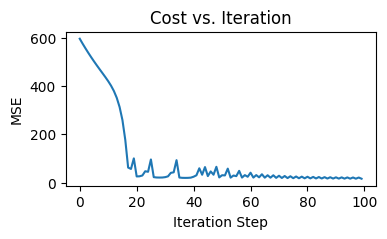

In [108]:
plot_cost(J_history, "MSE")

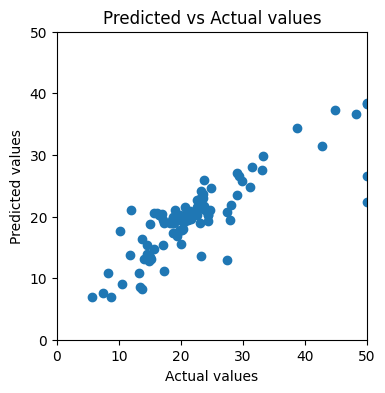

In [109]:
y_pred = predict(X_test_norm.T, parameters)

plot_pred_actual(y_test, y_pred)

In [110]:
mse = compute_mse(y_test, y_pred.reshape(-1))
print(f"Test MSE = {mse}")

Test MSE = 30.579988772119925
